## Line Plots

 - Primarily used when both x and y-axes are continuous data
   - Also used for time series data
 - General good practice
   - Axes to be continuous (no split axes)
   - Data to cover as much of the chart area as possible
   - No axis title for non-numerical time series data (e.g. day of week, month, date)

In [1]:
# necessary library imports and defining color palette

import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

# defined grey scale colour palette
# 'SlateGrey' primary colour can be changed to suit branding if required
colours = ['LightGrey','SlateGrey']

### Continuous data template

In [6]:
# 2 dataset line plot template is provided

# dataset is defined to generate example plot
data = pd.DataFrame({'x':[1,2,3], 'y1':[3,2,3], 'y2':[1,4,2]})

# other variables are defined to be easily changed in the template function
x = data['x']
y1 = data['y1']
y2 = data['y2']
axis_labels = ['x-axis', 'y-axis']
data_labels = ['secondary data', 'primary data']
legend_location = 'upper left'


# function defined to generate chart
def line_plot_cont(x, y1, y2, axis_labels, data_labels, legend_location, colours):

    # figure defined
    fig = plt.figure(figsize=(11,7))

    # seaborn library style set
    sns.set_style('ticks', )

    # plot the data using the seaborn library
    sns.lineplot(x=x, y=y1, color=colours[0], label=data_labels[0])
    sns.lineplot(x=x, y=y2, color=colours[1], label=data_labels[1])
    # format axis ticks to 1 decimal place
    plt.xticks(np.arange(min(x), max(x)+1, 1), fontsize=14, color='DimGrey')
    plt.yticks(np.arange(min(y2), max(y2)+1, 1), fontsize=14, color='DimGrey')
    # remove unnecessary spines and recolour others
    plt.gca().spines['left'].set_color('DimGrey')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('DimGrey')
    # format axis labels
    plt.xlabel(axis_labels[0], fontsize=20, color='DimGrey', loc='left')
    plt.ylabel(axis_labels[1], fontsize=20, color='DimGrey', loc='top')
    # format legend
    plt.legend(labelcolor = colours, prop = {'weight':'bold', 'size':18}, 
        handlelength = 0, loc = legend_location, frameon = False)

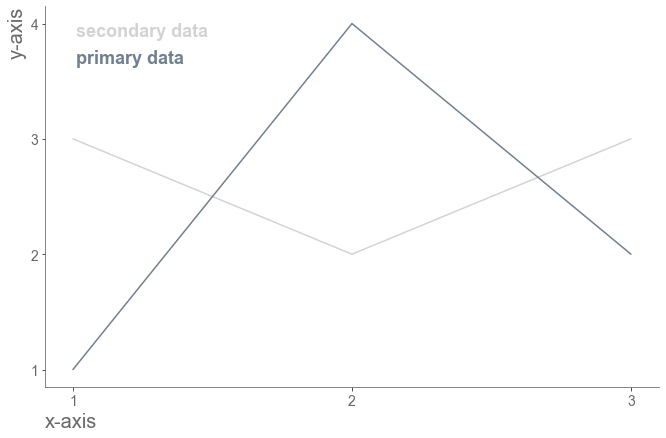

In [7]:
# example chart plot
line_plot_cont(x, y1, y2, axis_labels, data_labels, legend_location, colours)

### Time Series Data Example

In [8]:
# time series plt template is provided

# dataset is defined to generate example plot
data = pd.DataFrame({'date': ['5/7/21','6/7/21','6/7/21','8/7/21','9/7/21','12/7/21','12/7/21','14/7/21','14/7/21','15/7/21','20/7/21','21/7/21','21/7/21','22/7/21','22/7/21'],
    'reading': [5,5,6,7,6,10,9,11,12,10,25,26,26,27,25]})

# data timestamp is added to allow aggregation
# this codes converts to monthly
# full breakdown of different common timestamps here https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.html
# round to custom timestamp formats here https://pandas.pydata.org/docs/reference/api/pandas.Timestamp.round.html
data['timestamp'] = data['date'].apply(lambda x: pd.to_datetime(x, dayfirst=True).to_period('W').to_timestamp('W'))

# other variables are defined to be easily changed in the template function
x = data['timestamp']
y = data['reading']
axis_labels = ['', 'average score']

# function defined to generate chart
def line_plot_time(x, y, axis_labels, colour):

    # set up of figure
    fig = plt.figure(figsize=(11,7))

    sns.lineplot(x=x, y=y, color=colour)
    plt.xticks(fontsize=14, color='DimGrey')
    plt.yticks(fontsize=14, color='DimGrey')
    plt.gca().spines['left'].set_color('DimGrey')
    plt.gca().spines['top'].set_visible(False)
    plt.gca().spines['right'].set_visible(False)
    plt.gca().spines['bottom'].set_color('DimGrey')
    plt.xlabel(axis_labels[0], fontsize=20, color='DimGrey', loc='left')
    plt.ylabel(axis_labels[1], fontsize=20, color='DimGrey', loc='top')

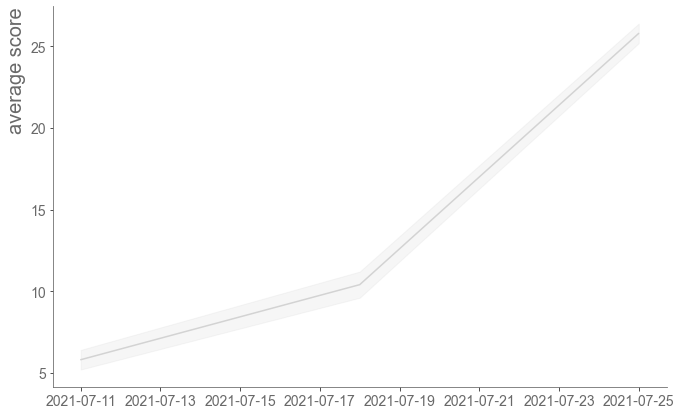

In [9]:
line_plot_time(x, y, axis_labels, colours[0])